<a href="https://colab.research.google.com/github/jubatistim/GoogleColabsGeneral/blob/master/ML_20200508__naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

Data: https://drive.google.com/file/d/1VKqbu-rPCp-Ii6pKVrAVo3ysJuKTrZ5o/view?usp=sharing

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [4]:
print(X_train[1:10,:])

[[    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]


In [19]:
print(y_train)

[1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0]


In [20]:
print(X_test[1:10,:])

[[    43 112000]
 [    38  80000]
 [    48  74000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    50  44000]
 [    40  65000]
 [    34 112000]]


In [21]:
print(y_test)

[0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
print(X_train[1:10,:])

[[-1.25256373 -0.41346514]
 [ 0.92896961 -1.05691478]
 [ 0.01999739 -0.55970369]
 [ 1.11076406 -0.96917164]
 [-1.61615262 -0.96917164]
 [-0.25269428 -1.43713502]
 [ 0.74717517  0.55170932]
 [ 1.65614739 -0.26722658]
 [ 0.29268906  0.08374595]]


In [24]:
print(X_test[1:10,:])

[[ 0.4744835   1.25365438]
 [ 0.01999739  0.31772763]
 [ 0.92896961  0.14224137]
 [-0.52538595 -1.49563044]
 [-1.79794706  0.37622305]
 [-0.79807761  0.31772763]
 [ 1.11076406 -0.73518996]
 [ 0.20179183 -0.12098803]
 [-0.3435915   1.25365438]]


## Training the Naive Bayes model on the Training set

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting a new result

In [26]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [27]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[1:15,:])

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[64  3]
 [ 6 27]]


0.91

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


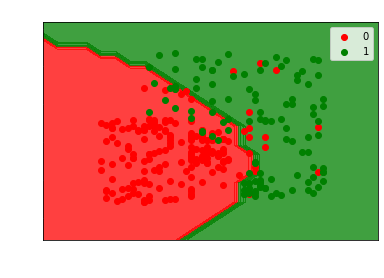

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


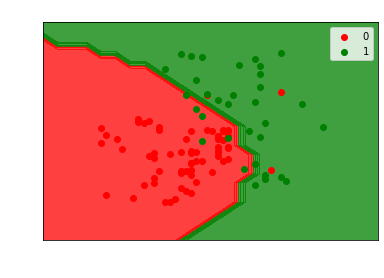

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()